4.10 Instacart Final Task Contents Import Libraries and Dataframes Create regional segmentation of data Determine whether there’s a difference in spending habits between the different U.S. regions Create an exclusion flag for low-activity customers Customer profiling Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure Compare customer profiles with regions and departments Visualizations

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'OneDrive/Desktop/Instacart basket Analysis 12-2024'

In [5]:
# install dataframe
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_products_customers_merge.pkl'))

3. Create a regional segmentation of the data

In [9]:
# Assign Northeast Region
instacart.loc[instacart['state'] == 'Maine', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'New Hampshire', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'Vermont', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'Pennsylvania', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'Massachusetts', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'Rhode Island', 'region'] = 'Northeast'
instacart.loc[instacart['state'] == 'Connecticut', 'region'] = 'Northeast'

In [11]:
# Assign Midwest Region
instacart.loc[instacart['state'] == 'Wisconsin', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Michigan', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Illinois', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Indiana', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Ohio', 'region'] = 'Midwest'

In [13]:
# Assign Midwest Region2
instacart.loc[instacart['state'] == 'North Dakota', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'South Dakota', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Nebraska', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Kansas', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Minnesota', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Iowa', 'region'] = 'Midwest'
instacart.loc[instacart['state'] == 'Missouri', 'region'] = 'Midwest'

In [15]:
# Assign South Region
instacart.loc[instacart['state'] == 'Delaware', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Maryland', 'region'] = 'South'
instacart.loc[instacart['state'] == 'District of Columbia', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Virginia', 'region'] = 'South'
instacart.loc[instacart['state'] == 'West Virginia', 'region'] = 'South'
instacart.loc[instacart['state'] == 'North Carolina', 'region'] = 'South'
instacart.loc[instacart['state'] == 'South Carolina', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Georgia', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Florida', 'region'] = 'South'

In [16]:
# Assign South Region2
instacart.loc[instacart['state'] == 'Kentucky', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Tennessee', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Mississippi', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Alabama', 'region'] = 'South'

In [17]:
# Assign South Region3
instacart.loc[instacart['state'] == 'Oklahoma', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Texas', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Arkansas', 'region'] = 'South'
instacart.loc[instacart['state'] == 'Louisiana', 'region'] = 'South'

In [21]:
# Assign West Region
instacart.loc[instacart['state'] == 'Idaho', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Montana', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Wyoming', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Nevada', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Utah', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Colorado', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Arizona', 'region'] = 'West'
instacart.loc[instacart['state'] == 'New Mexico', 'region'] = 'West'

In [22]:
# Assign West Region2
instacart.loc[instacart['state'] == 'Alaska', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Washington', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Oregon', 'region'] = 'West'
instacart.loc[instacart['state'] == 'California', 'region'] = 'West'
instacart.loc[instacart['state'] == 'Hawaii', 'region'] = 'West'

Determine whether there’s a difference in spending habits between the different U.S. regions

In [26]:
# Crosstab Region to spending flag
crosstab = pd.crosstab(instacart['region'], instacart['spending_flag'], dropna = False)

In [27]:
crosstab.to_clipboard()

In [30]:
# save changes to instacart
instacart.to_pickle(os.path.join(path, '02 Data','Prepared data', 'orders_products_customers_merge.pkl'))

4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [32]:
# Create a flag for customers with less than 5 orders
instacart.loc[instacart['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
instacart.loc[instacart['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [33]:
instacart['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [37]:
# Exclude low-activity customers from the dataframe
df_excluded = instacart[instacart['activity_flag'] != 'low-activity customer']

In [38]:
instacart.head()

,order_id,user_id,order_count,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer


In [41]:
instacart.shape

(32404859, 34)

In [91]:
instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   order_id                    int32  
 1   user_id                     int32  
 2   order_count                 int8   
 3   order_dow                   int8   
 4   order_hour_of_day           int8   
 5   days_since_prior_order      float16
 6   product_id                  int32  
 7   add_to_cart_order           int32  
 8   reordered                   int8   
 9   product_name                object 
 10  aisle_id                    int8   
 11  department_id               int8   
 12  prices                      float16
 13  price_range_loc             object 
 14  busiest_day                 object 
 15  busiest_days                object 
 16  busiest_period_of_day       object 
 17  max_order                   int8   
 18  loyalty_flag                object 
 19  avg_product_price  

In [43]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

5. & 6. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. Then create images
   

income

In [48]:
# Create an income group variable
df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'
df_excluded.loc[(df_excluded['income'] > 55000) & (df_excluded['income'] <= 150000), 'income_group'] = 'middle-income'
df_excluded.loc[df_excluded['income'] > 150000, 'income_group'] = 'high-income'

C:\Users\aaron\AppData\Local\Temp\ipykernel_9304\1030381792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['income'] <= 55000, 'income_group'] = 'low-income'


In [50]:
# Check the counts of income groups
df_excluded['income_group'].value_counts(dropna = False)

income_group
middle-income    22617642
low-income        4452388
high-income       3894534
Name: count, dtype: int64

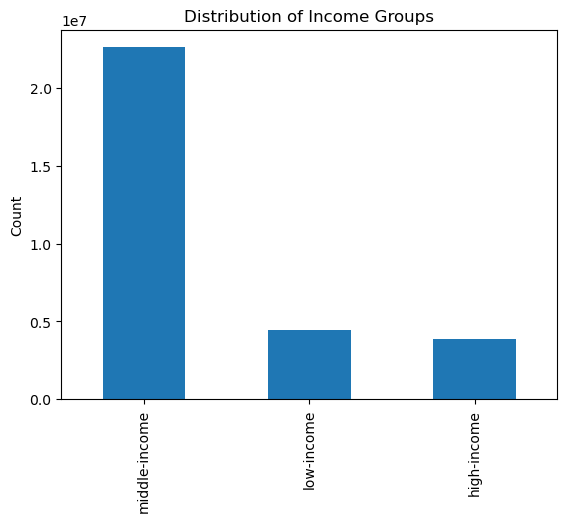

In [52]:
# Make a bar chart showing the distribution of income groups
income_group_counts = df_excluded['income_group'].value_counts(dropna=False)
income_group_distribution_bar = income_group_counts.plot.bar()  
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [54]:
# Export the bar chart
income_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution_bar.png'))

Age

In [57]:
# Create an age group variable
df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'
df_excluded.loc[(df_excluded['age'] > 25) & (df_excluded['age'] <= 44), 'age_group'] = 'adult'
df_excluded.loc[(df_excluded['age'] > 44) & (df_excluded['age'] <= 64), 'age_group'] = 'middle-aged'
df_excluded.loc[df_excluded['age'] > 64, 'age_group'] = 'senior'

C:\Users\aaron\AppData\Local\Temp\ipykernel_9304\2854730798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['age'] <= 25, 'age_group'] = 'young adult'


In [59]:
# Check value counts for each age group
age_group_counts = df_excluded['age_group'].value_counts(dropna = False)
age_group_counts

age_group
middle-aged    9690051
adult          9214451
senior         8195544
young adult    3864518
Name: count, dtype: int64

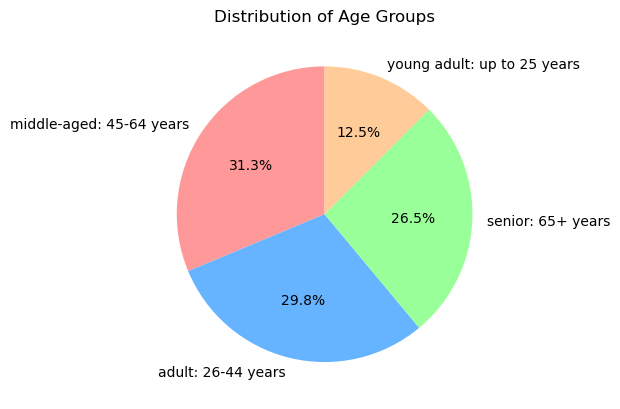

In [61]:
# Make a pie chart showing the distribution of age groups
age_group_distribution_pie = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age Groups')
plt.show()

In [63]:
# Export chart
age_group_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_pie.png'))

Dependants

In [66]:
# Create a dependents flag
df_excluded.loc[df_excluded['n_dependants'] == 0, 'dependants_flag'] = 'no dependants'
df_excluded.loc[df_excluded['n_dependants'] >= 1, 'dependants_flag'] = 'has dependants'

C:\Users\aaron\AppData\Local\Temp\ipykernel_9304\2552754020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['n_dependants'] == 0, 'dependants_flag'] = 'no dependants'


In [68]:
# Check value counts
dependant_counts = df_excluded['dependants_flag'].value_counts(dropna = False)
dependant_counts

dependants_flag
has dependants    23224883
no dependants      7739681
Name: count, dtype: int64

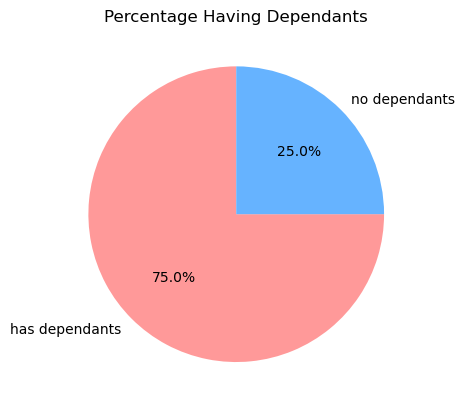

In [70]:
# Make a pie chart showing the percentage of dependants
dependants_pie = dependant_counts.plot.pie(autopct='%1.1f%%', labels= ['has dependants', 'no dependants'], startangle=90, colors=['#ff9999','#66b3ff'])
plt.ylabel('')  # Hide the y-label
plt.title('Percentage Having Dependants')
plt.show()

Orders by department

In [162]:
# Import departments dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'prepared data', 'departments_wrangled.csv'))

In [166]:
dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [199]:
# changing column unnamed: 0 to department_id to merge later
df_new = dept.rename(columns = {'Unnamed: 0': 'department_id'})

In [205]:
# import dataframe
df_excluded = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_excluded.pkl'))

In [209]:
df_final_merged = df_excluded.merge(dept_new, on = 'department_id')

In [216]:
# checking to make sure the deaprtment column was merged correctly
df_final_merged.head()

,order_id,user_id,order_count,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,marital_status,income,region,activity_flag,income_group,age_group,dependants_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants,beverages
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants,dairy eggs
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants,snacks
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants,snacks
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants,household


In [218]:
# Exporting new dataframe with department merged 
df_final_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.pkl'))

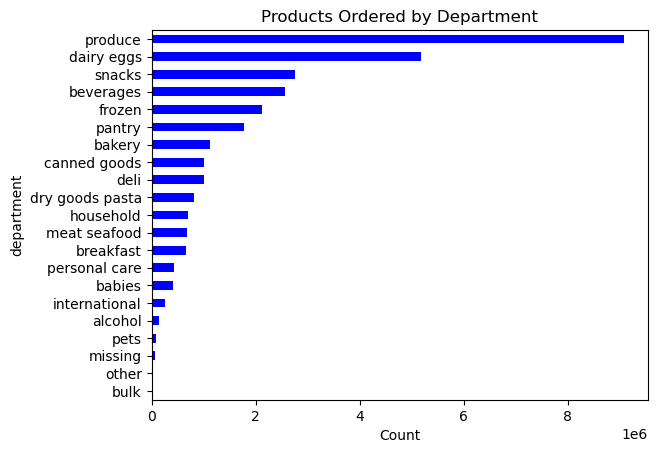

In [220]:
# bar chart frequency of orders vs department
depts_bar = df_final_merged['department'].value_counts(ascending=True).plot(kind='barh', color='blue', xlabel = 'Count', title='Products Ordered by Department')

In [222]:
# Export bar chart
depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_bar.png'))

Age vs Department 

In [225]:
# crosstab age group vs department
age_dept_cross = pd.crosstab(df_final_merged['age_group'], df_final_merged['department'], dropna = False)
age_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
adult,42167,123044,334154,754851,198803,9902,302479,1549127,299970,243702,...,207553,76675,199124,19130,10198,529307,125522,27034,2712590,824677
middle-aged,46579,129910,350804,814687,211274,10298,315774,1612490,314110,256920,...,218860,79743,209927,20340,10811,558929,134736,28293,2830853,867564
senior,36693,106204,295997,684020,175296,8945,267509,1368072,265199,217316,...,186630,67199,181150,16915,8946,472383,111052,25115,2408104,728549
young adult,19188,51234,139873,318343,85477,4306,126312,647493,124555,104198,...,86814,32374,84580,8383,4456,222086,52996,12618,1127726,345616


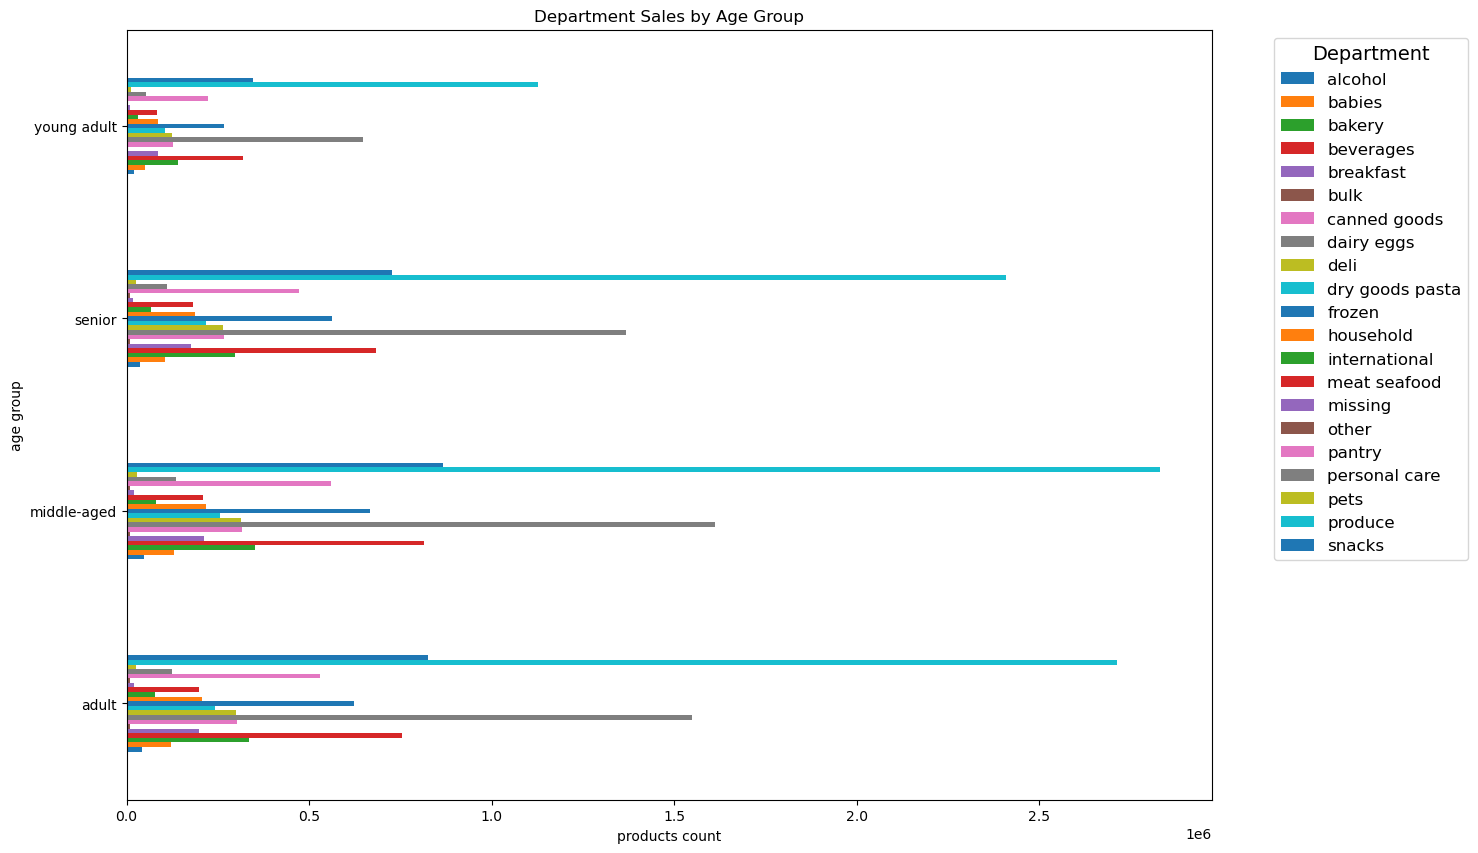

In [227]:
# bar chart
age_dept_bar = age_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Age Group')
plt.xlabel('products count')
plt.ylabel('age group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [229]:
# Export bar chart
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_depts_bar.png'))

income VS department 

In [232]:
# crosstab income group vs department
income_dept_cross = pd.crosstab(df_final_merged['income_group'], df_final_merged['department'], dropna = False)
income_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high-income,24067,53001,148430,313325,83418,3671,132389,659149,125886,106335,...,92674,32822,91514,8253,4554,231915,53530,12991,1134490,305779
low-income,22199,43438,144086,479742,116540,5974,112945,680816,141758,92401,...,111508,30240,54717,8902,4958,226221,62888,11782,1139552,673753
middle-income,98361,313953,828312,1778834,470892,23806,766740,3837217,736190,623400,...,495675,192929,528550,47613,24899,1324569,307888,68287,6805231,1786874


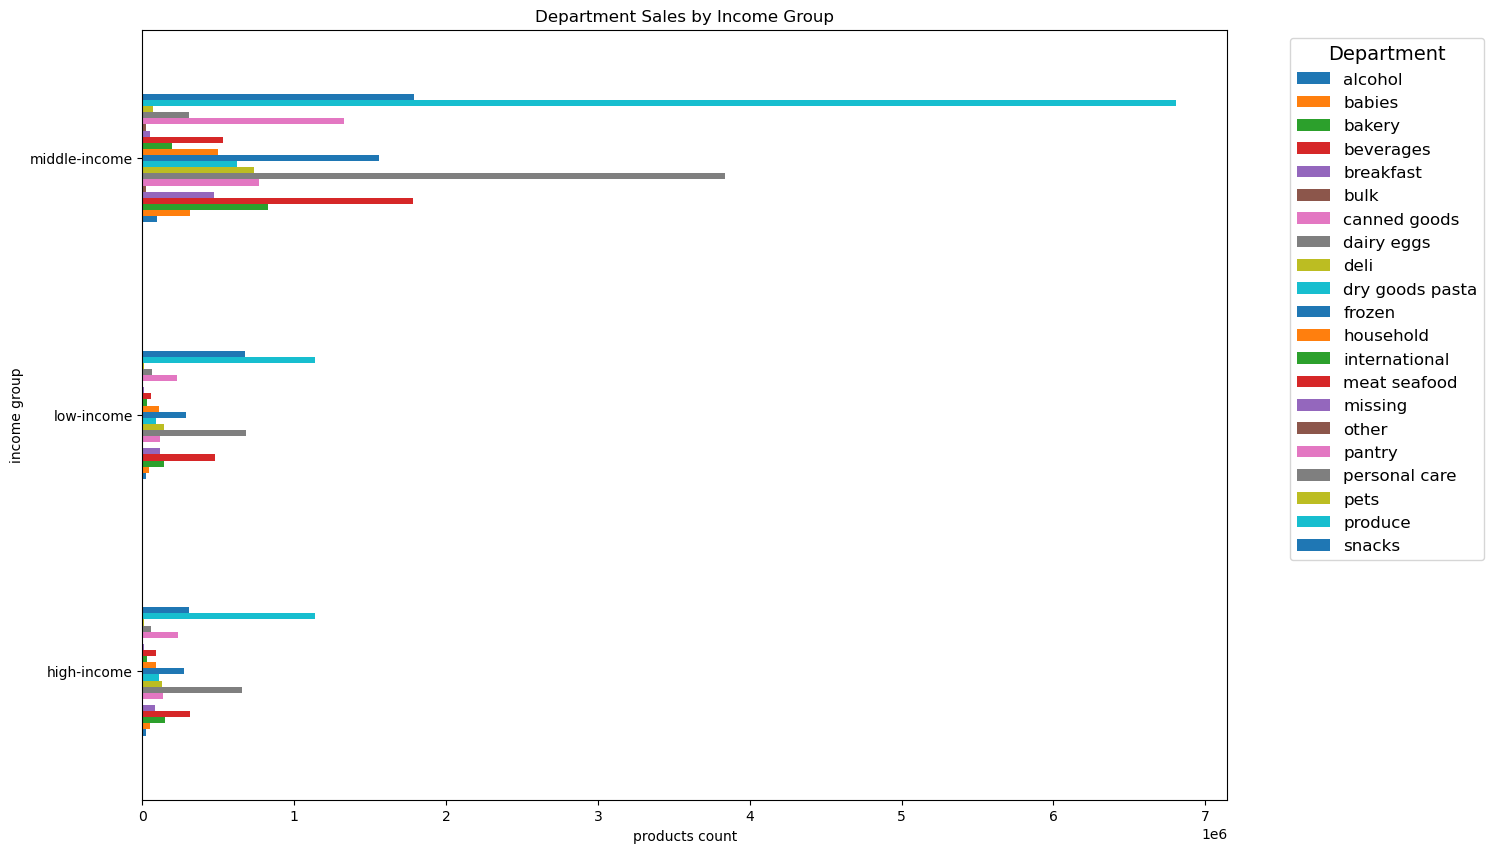

In [234]:
# bar chart
income_dept_bar = income_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Income Group')
plt.xlabel('products count')
plt.ylabel('income group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [236]:
# Export bar chart
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_depts_bar.png'))

loyalty vs age group

In [239]:
# Crosstab loyalty with age group
loyalty_age_cross = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['age_group'], dropna = False)
loyalty_age_cross

age_group,adult,middle-aged,senior,young adult
loyalty_flag,,,,
Loyal customer,3048175,3231509,2723958,1280451
New customer,1420508,1506670,1276659,599858
Regular customer,4745768,4951872,4194927,1984209


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

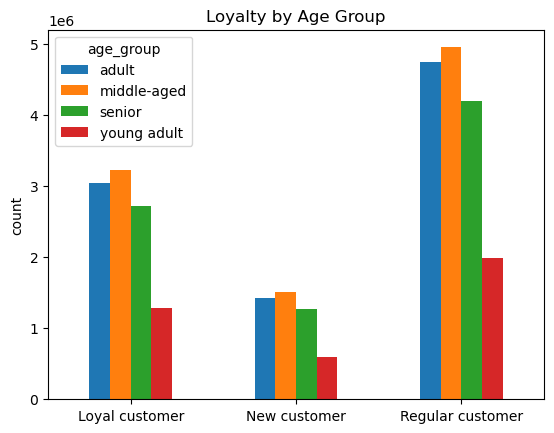

In [241]:
# bar chart
loyalty_age_bar = loyalty_age_cross.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [243]:
# Export the chart
loyalty_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_age_group_bar.png'))

spending by age group

In [248]:
# Crosstab spending with age group
spending_age_cross = pd.crosstab(df_excluded['spending_flag'], df_excluded['age_group'], dropna = False)
spending_age_cross

age_group,adult,middle-aged,senior,young adult
spending_flag,,,,
High spender,28064,31087,26777,11382
Low spender,9186387,9658964,8168767,3853136


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

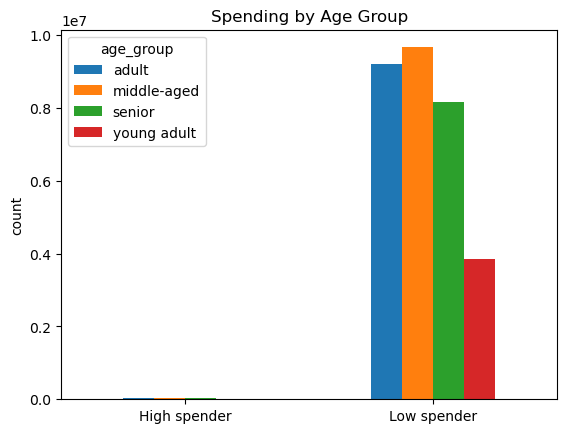

In [250]:
# bar chart
spending_age_bar = spending_age_cross.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [252]:
# Export the chart
spending_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_age_group_bar.png'))

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [263]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df_final_merged.groupby(['user_id', 'gender', 'state', 'region', 'n_dependants', 'marital_status', 'age_group', 'order_count', 'order_dow', 'order_hour_of_day', 'loyalty_flag', 'order_frequency_flag', 'dependants_flag', 'income_group', 'spending_flag'])['prices'].sum().reset_index()

In [265]:
customer_profile.head()

,user_id,gender,state,region,n_dependants,marital_status,age_group,order_count,order_dow,order_hour_of_day,loyalty_flag,order_frequency_flag,dependants_flag,income_group,spending_flag,prices
0,1,Female,Alabama,South,3,married,adult,1,2,8,New customer,Non-frequent customer,has dependants,low-income,Low spender,31.597656
1,1,Female,Alabama,South,3,married,adult,2,3,7,New customer,Non-frequent customer,has dependants,low-income,Low spender,35.394531
2,1,Female,Alabama,South,3,married,adult,3,3,12,New customer,Non-frequent customer,has dependants,low-income,Low spender,28.199219
3,1,Female,Alabama,South,3,married,adult,4,4,7,New customer,Non-frequent customer,has dependants,low-income,Low spender,26.000000
4,1,Female,Alabama,South,3,married,adult,5,4,15,New customer,Non-frequent customer,has dependants,low-income,Low spender,56.996094


In [269]:
# Aggregate variables for customer profiles for expenditure
customer_agg = customer_profile.groupby('user_id').agg({'order_count': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [271]:
customer_agg

order_count                prices                        
                max min  mean         max         min        mean
user_id                                                          
1                10   1   5.5   63.100586   25.000000   37.568459
2                14   1   7.5  213.097656   19.000977  104.683311
3                12   1   6.5  107.195312   30.698242   60.115479
4                 5   1   3.0   63.404297   10.796875   29.539062
7                20   1  10.5  166.698242    6.300781   76.906250
...             ...  ..   ...         ...         ...         ...
206203            5   1   3.0  216.286133  126.601562  169.898438
206206           67   1  34.0  157.302734    9.601562   32.528057
206207           16   1   8.5  200.792969   42.799805  101.922974
206208           49   1  25.0  238.487305   38.695312  115.595345
206209           13   1   7.0  131.489258   11.101562   70.040565

[156301 rows x 6 columns]

In [275]:
# Aggregate variables for customer profiles for usage frequency
freq_agg = df_excluded.groupby('user_id').agg({'order_count': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [277]:
freq_agg

order_count                days_since_prior_order                 
                max min       mean                    max   min       mean
user_id                                                                   
1                10   1   5.813559                   30.0   0.0  20.259260
2                14   1   8.035897                   30.0   3.0  15.967033
3                12   1   6.000000                   21.0   7.0  11.487180
4                 5   1   2.888889                   21.0   0.0  15.357142
7                20   1   9.645631                   30.0   2.0  13.546391
...             ...  ..        ...                    ...   ...        ...
206203            5   1   2.983193                   30.0  27.0  29.103092
206206           67   1  38.007018                   15.0   0.0   4.042705
206207           16   1   8.116592                   30.0   1.0  14.879397
206208           49   1  25.505170                   20.0   0.0   7.442105
206209           13   1   6.937984                   30.0   3.0  20.275862

[162631 rows x 6 columns]

8. Compare customer profiles with regions and departments

Region vs Departmant

In [281]:
# crosstab age group vs department
region_dept_cross = pd.crosstab(df_final_merged['region'], df_final_merged['department'], dropna = False)
region_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,20120,56872,155882,364615,92420,4471,137738,711976,139808,111939,...,96810,35265,91595,8970,4926,244582,58664,13150,1239418,384202
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329
NaN,4897,15840,43418,98314,25484,1128,39198,202640,38590,31878,...,27794,9413,26976,2542,1342,68149,16101,4584,353586,108952


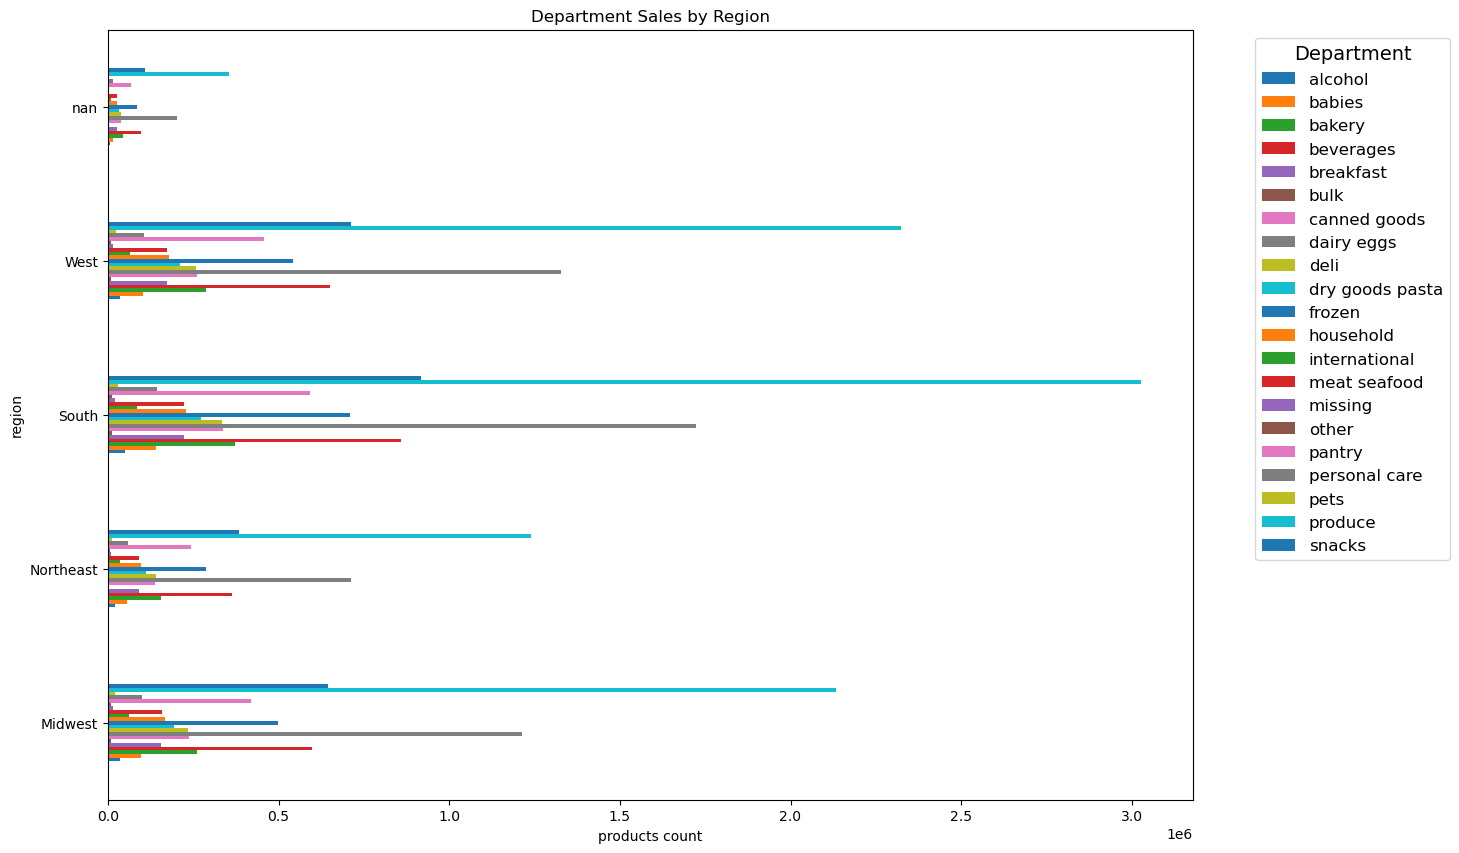

In [283]:
# bar chart
region_dept_bar = region_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [285]:
# Export bar chart
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_depts_bar.png'))

In [287]:
# import orders_products_customers
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_departments.pkl'))

Text(0.5, 0, '')

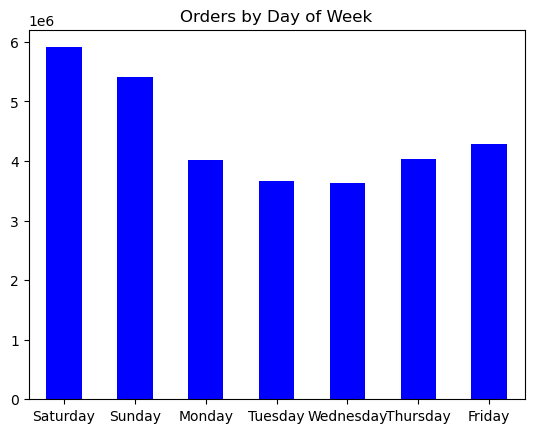

In [291]:
# bar chart orders by day of week
orders_dow_bar = df['order_dow'].value_counts().sort_index().plot.bar(color = 'blue')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
orders_dow_bar.set_xlabel("")

In [293]:
# Export bar chart
orders_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_dow_bar.png'))

Text(0.5, 0, 'Hour of Day (24 hr clock)')

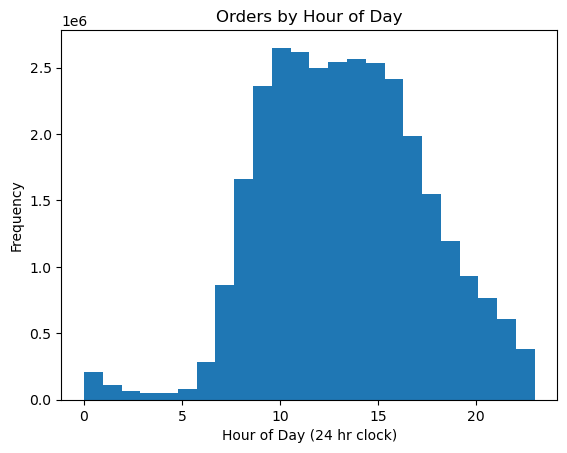

In [295]:
# histogram of hours of the day
hod_hist=df['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day (24 hr clock)')

In [297]:
# Export histogram
hod_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hod_hist.png'))

In [301]:
# Crosstab loyalty with family status
loyalty_fam_cross = pd.crosstab(df['loyalty_flag'], df['marital_status'], dropna = False)
loyalty_fam_cross

marital_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,882722,492749,7202500,1706122
New customer,403781,221779,3380651,797484
Regular customer,1358768,766644,11160560,2590804


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

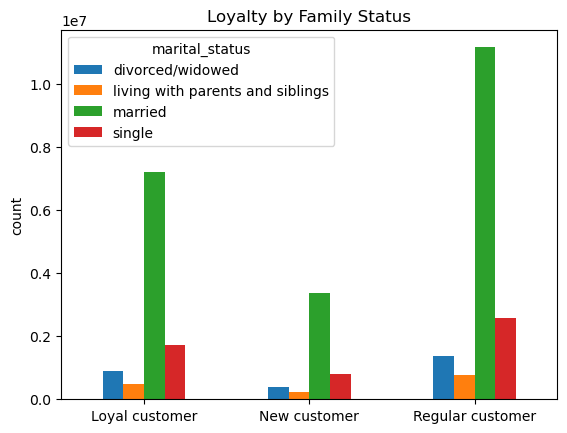

In [303]:
# bar chart
loyalty_fam_bar = loyalty_fam_cross.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [305]:
# Export the chart
loyalty_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_fam_bar.png'))

In [309]:
# Check value counts
fam_status = df['marital_status'].value_counts(dropna = False)
fam_status

marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

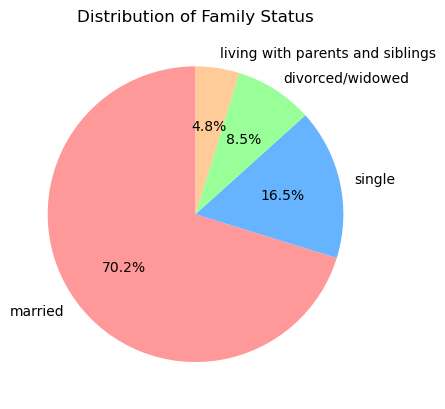

In [311]:
# Pie chart showing the distribution of family status
fam_status_distribution_pie = fam_status.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Family Status')
plt.show()

In [313]:
# Export the chart
fam_status_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_status_bar.png'))